## RFM 먼저 지정

In [2]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 결측치 시각화를 위한 라이브러리
import missingno

In [3]:
import pandas as pd

# 파일 경로 설정
file_path = 'data/train/3.승인매출정보/201812_train_승인매출정보.parquet'

# parquet 파일 불러오기
df3_12mon = pd.read_parquet(file_path)

# 데이터 확인
df3_12mon

,기준년월,ID,최종이용일자_기본,최종이용일자_신판,최종이용일자_CA,최종이용일자_카드론,최종이용일자_체크,최종이용일자_일시불,최종이용일자_할부,이용건수_신용_B0M,...,승인거절건수_한도초과_B0M,승인거절건수_BL_B0M,승인거절건수_입력오류_B0M,승인거절건수_기타_B0M,승인거절건수_R3M,승인거절건수_한도초과_R3M,승인거절건수_BL_R3M,승인거절건수_입력오류_R3M,승인거절건수_기타_R3M,이용금액대
0,201812,TRAIN_000000,20181224,20181224,20181221,10101,20180203,20181224,20180713,7,...,0,0,0,0,0,0,0,0,0,01.100만원+
1,201812,TRAIN_000001,20181214,20181214,20170728,20170327,10101,20181214,20171231,9,...,0,0,0,0,0,0,0,0,0,03.30만원+
2,201812,TRAIN_000002,20181228,20181228,20181216,20151119,20141230,20181228,20181115,20,...,0,0,0,0,0,0,0,0,0,01.100만원+
3,201812,TRAIN_000003,20181221,20181212,20181221,10101,20141111,20181203,20181212,12,...,0,0,0,0,0,0,0,0,0,01.100만원+
4,201812,TRAIN_000004,20180905,20180905,10101,10101,20181210,20180905,10101,0,...,0,0,0,0,0,0,0,0,0,05.10만원-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,201812,TRAIN_399995,20181220,20181220,10101,10101,20181212,20181220,20160501,2,...,0,0,0,0,0,0,0,0,0,09.미사용
399996,201812,TRAIN_399996,20181202,20181202,10101,20170112,10101,20181202,20180112,10,...,0,0,0,0,0,0,0,0,0,01.100만원+
399997,201812,TRAIN_399997,20181230,20181230,10101,10101,20131124,20181230,20180919,10,...,0,0,0,0,0,0,0,0,0,02.50만원+
399998,201812,TRAIN_399998,20161224,20161224,10101,10101,10101,20161224,20150122,-2,...,0,0,0,0,0,0,0,0,0,09.미사용


In [4]:
#### F
# 음수를 제거하고 합산하는 방식
# 음수값은 0으로 대체한 후, 합산
cols = [
    '이용건수_신용_B0M'
]

# 음수값 0으로 처리하고 합산
df3_12mon['이용건수합계_B0M_정제'] = df3_12mon[cols].applymap(lambda x: x if x > 0 else 0).sum(axis=1)

In [5]:
#### M
# 이용금액 총합 (M - Monetary 지표)
df3_12mon['결제금액합계_B0M'] = (
    df3_12mon['이용금액_일시불_B0M'] +
    df3_12mon['이용금액_할부_B0M'] +
    df3_12mon['이용금액_CA_B0M'] +
    df3_12mon['이용금액_체크_B0M'] +
    df3_12mon['이용금액_카드론_B0M']
)

In [6]:
#### M 정
# 음수를 제거하고 합산하는 방식
# 음수값은 0으로 대체한 후, 합산
cols = [
    '이용금액_일시불_B0M', '이용금액_할부_B0M', '이용금액_CA_B0M', '이용금액_체크_B0M',
    '이용금액_카드론_B0M'
]

# 음수값 0으로 처리하고 합산
df3_12mon['결제금액합계_B0M_정제'] = df3_12mon[cols].applymap(lambda x: x if x > 0 else 0).sum(axis=1)

# 수동 설정

In [8]:
# 컬럼 이름 변수로 저장
r_col = '이용후경과월_신용'
f_col = '이용건수합계_B0M_정제'
m_col = '결제금액합계_B0M_정제'

# 최소한의 컬럼만 복사하여 새로운 데이터프레임 생성
rfm_df = df3_12mon[[r_col, f_col, m_col]].copy()

In [9]:
# 점수 부여 함수 정의
def score_recency(r):
    if r == 0:
        return 5
    elif r <= 2:
        return 4
    elif r <= 5:
        return 3
    elif r <= 9:
        return 2
    else:
        return 1

def score_frequency(f):
    if f == 0:
        return 1
    elif f <= 1:
        return 2
    elif f <= 3:
        return 3
    elif f <= 6:
        return 4
    else:
        return 5

def score_monetary(m):
    if m == 0:
        return 1
    elif m <= 100000:
        return 2
    elif m <= 300000:
        return 3
    elif m <= 600000:
        return 4
    else:
        return 5

# 점수 계산
rfm_df['R_score'] = df3_12mon[r_col].apply(score_recency)
rfm_df['F_score'] = df3_12mon[f_col].apply(score_frequency)
rfm_df['M_score'] = df3_12mon[m_col].apply(score_monetary)

# RFM 스코어 결합
rfm_df['RFM_Score'] = (
    rfm_df['R_score'].astype(str) +
    rfm_df['F_score'].astype(str) +
    rfm_df['M_score'].astype(str)
)

# 결과 확인
rfm_df[['R_score', 'F_score', 'M_score', 'RFM_Score']].head()

,R_score,F_score,M_score,RFM_Score
0,5,5,2,552
1,5,5,2,552
2,5,5,2,552
3,5,5,2,552
4,3,1,2,312


In [10]:
# 컬럼 이름 변수로 저장
r_col = '이용후경과월_신용'
f_col = '이용건수합계_B0M_정제'
m_col = '결제금액합계_B0M_정제'

# R 점수 함수
# 누적 분포에 따라서 지정됌
def custom_r_score(r):
    if r == 0: return 5
    elif r == 1: return 4
    elif 2 <= r <= 4: return 3
    elif 5 <= r <= 11: return 2
    else: return 1


# F 점수 함수
def score_frequency(f):
    if f == 0:
        return 1
    elif f <= 1:
        return 2
    elif f <= 3:
        return 3
    elif f <= 6:
        return 4
    else:
        return 5

# M 점수 함수
def score_monetary(m):
    if m < 0:
        m = 0
    if m == 0:
        return 1
    elif m <= 3000:
        return 2
    elif m <= 7000:
        return 3
    elif m <= 15000:
        return 4
    else:
        return 5

# 점수 계산
rfm_df['R_score'] = rfm_df[r_col].apply(score_recency)
rfm_df['F_score'] = rfm_df[f_col].apply(score_frequency)
rfm_df['M_score'] = rfm_df[m_col].apply(score_monetary)

# RFM Score 결합
rfm_df['RFM_Score'] = (
    rfm_df['R_score'].astype(str) +
    rfm_df['F_score'].astype(str) +
    rfm_df['M_score'].astype(str)
)


# 결과 확인
rfm_df[['R_score', 'F_score', 'M_score', 'RFM_Score']].head()

,R_score,F_score,M_score,RFM_Score
0,5,5,4,554
1,5,5,2,552
2,5,5,5,555
3,5,5,5,555
4,3,1,3,313


### K_Means

  File "C:\Users\ska12\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\ska12\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ska12\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\ska12\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


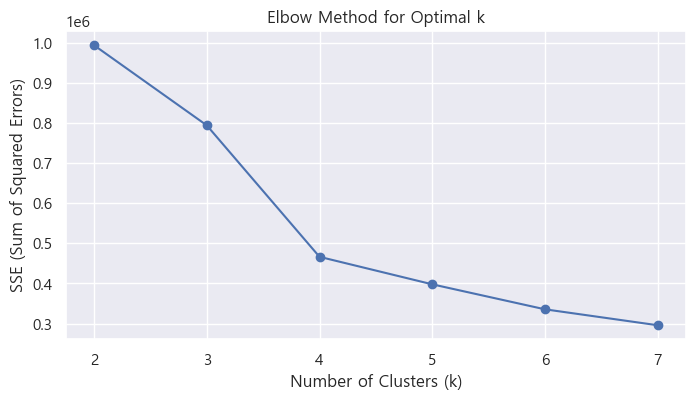

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. R, F, M 점수만 추출
rfm_features = rfm_df[['R_score', 'F_score', 'M_score']]

# 2. 최적 클러스터 수 확인 (Elbow Method)
sse = []
k_range = range(2, 8)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(rfm_features)
    sse.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, sse, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("SSE (Sum of Squared Errors)")
plt.grid(True)
plt.show()

In [13]:
# 3. 클러스터링 실행 (k=5)
kmeans = KMeans(n_clusters=5, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_features)

# 4. 클러스터별 통계 확인
cluster_summary = rfm_df.groupby('Cluster')[['R_score', 'F_score', 'M_score']].mean().round(2)
cluster_counts = rfm_df['Cluster'].value_counts().sort_index()

print("📊 클러스터별 평균 점수")
display(cluster_summary)

print("\n👥 각 클러스터별 고객 수")
print(cluster_counts)

📊 클러스터별 평균 점수


,R_score,F_score,M_score
Cluster,,,
0,4.77,4.88,4.33
1,1.56,1.14,1.16
2,4.51,1.76,2.00
3,4.62,4.79,2.65
4,1.83,3.63,1.76



👥 각 클러스터별 고객 수
Cluster
0     96198
1     83699
2     81359
3    120260
4     18484
Name: count, dtype: int64


### 세그먼트 분포

In [15]:
# 파일 경로와 시트명에 따라 다를 수 있으니 수정 필요
file_path = 'data/train/1.회원정보/201812_train_회원정보.parquet'

member_df = pd.read_parquet(file_path)

# 고객 식별 컬럼명 확인 후 아래에서 사용 (예: 고객ID, 고객번호 등)
segment_df = member_df[['ID', 'Segment']]

In [16]:
# rfm_df에 ID 컬럼을 추가한다.
rfm_df = df3_12mon[['ID', r_col, f_col, m_col]].copy()

# rfm_df에 고객ID가 있어야 병합 가능
rfm_with_segment = pd.merge(rfm_df, segment_df, on='ID', how='left')

In [17]:
# 1. R, F, M 점수 부여 함수 정의
# R 점수 함수
# 누적 분포에 따라서 지정됌
def custom_r_score(r):
    if r == 0: return 5
    elif r == 1: return 4
    elif 2 <= r <= 4: return 3
    elif 5 <= r <= 11: return 2
    else: return 1

def score_frequency(f):
    if f == 0: return 1
    elif f <= 1: return 2
    elif f <= 3: return 3
    elif f <= 6: return 4
    else: return 5

# M 점수 함수
def score_monetary(m):
    if m < 0:
        m = 0
    if m == 0: return 1
    elif m <= 3000: return 2
    elif m <= 7000: return 3
    elif m <= 15000: return 4
    else: return 5

# 2. rfm_df 생성
rfm_df = df3_12mon[['ID', r_col, f_col, m_col]].copy()

# 3. 점수 계산
rfm_df['R_score'] = rfm_df[r_col].apply(score_recency)
rfm_df['F_score'] = rfm_df[f_col].apply(score_frequency)
rfm_df['M_score'] = rfm_df[m_col].apply(score_monetary)

# 4. 클러스터링
from sklearn.cluster import KMeans
rfm_scores = rfm_df[['R_score', 'F_score', 'M_score']]
rfm_df['Cluster'] = KMeans(n_clusters=5, random_state=42).fit_predict(rfm_scores)

# 5. Segment 불러와서 병합
segment_df = member_df[['ID', 'Segment']]
rfm_with_segment = pd.merge(rfm_df, segment_df, on='ID', how='left')

# 6. 분포 확인
cross_tab = pd.crosstab(rfm_with_segment['Cluster'], rfm_with_segment['Segment'])
ratio_table = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

print("📊 클러스터별 Segment 분포 (빈도):")
display(cross_tab)

print("\n📈 클러스터별 Segment 분포 (비율 %):")
display(ratio_table.round(2))

📊 클러스터별 Segment 분포 (빈도):


Segment,A,B,C,D,E
Cluster,,,,,
0,160,24,18228,39912,37874
1,0,0,596,2510,80593
2,2,0,931,4509,75917
3,0,0,1171,10160,108929
4,0,0,339,1116,17029



📈 클러스터별 Segment 분포 (비율 %):


Segment,A,B,C,D,E
Cluster,,,,,
0,0.17,0.02,18.95,41.49,39.37
1,0.00,0.00,0.71,3.00,96.29
2,0.00,0.00,1.14,5.54,93.31
3,0.00,0.00,0.97,8.45,90.58
4,0.00,0.00,1.83,6.04,92.13


In [18]:
# 📊 Segment 기준 클러스터 분포 비율 (%)
segment_ratio_by_cluster = cross_tab.div(cross_tab.sum(axis=0), axis=1) * 100

print("📌 Segment별 클러스터 분포 비율 (%):")
display(segment_ratio_by_cluster.round(2))

📌 Segment별 클러스터 분포 비율 (%):


Segment,A,B,C,D,E
Cluster,,,,,
0,98.77,100.0,85.72,68.57,11.82
1,0.00,0.0,2.80,4.31,25.16
2,1.23,0.0,4.38,7.75,23.70
3,0.00,0.0,5.51,17.45,34.00
4,0.00,0.0,1.59,1.92,5.32


In [19]:
# 클러스터별 Segment 분포 개수 (빈도수 기준)
segment_count_by_cluster = rfm_with_segment.groupby(['Cluster', 'Segment']).size().unstack().fillna(0)

# 비율로 변환 (%)
segment_ratio = segment_count_by_cluster.div(segment_count_by_cluster.sum(axis=1), axis=0) * 100
segment_ratio = segment_ratio.round(2)

In [20]:
# 클러스터별 Segment 명칭 딕셔너리 정의 (예시)
segment_names_dict = {
    0: 'VIP 고객',
    1: '이탈 고객',
    2: '신규 고객',
    3: '충성 고객',
    4: '빈번 저가 고객'  # 새롭게 정의한 4번
}

# 비율 테이블에 'Segment 명칭' 컬럼 추가
segment_ratio_named = segment_ratio.copy()
segment_ratio_named['Segment 명칭'] = segment_ratio_named.index.map(segment_names_dict)

# 컬럼 순서 재정렬
segment_ratio_named = segment_ratio_named.reset_index()[['Cluster', 'Segment 명칭'] + list(segment_ratio.columns)]

# 보기 좋게 출력
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format  # 소수점 2자리로 보기 좋게
display(segment_ratio_named)

Segment,Cluster,Segment 명칭,A,B,C,D,E
0,0,VIP 고객,0.17,0.02,18.95,41.49,39.37
1,1,이탈 고객,0.00,0.00,0.71,3.00,96.29
2,2,신규 고객,0.00,0.00,1.14,5.54,93.31
3,3,충성 고객,0.00,0.00,0.97,8.45,90.58
4,4,빈번 저가 고객,0.00,0.00,1.83,6.04,92.13


## VIP 고객만 추출해서 의미있는 결과가 있는지 확인

In [22]:
vip_df = rfm_with_segment[(rfm_with_segment['Cluster'] == 0)]

### 보내주신 컬럼들을 모든 시트에서 불러옴

In [24]:
import pandas as pd
import os
from glob import glob

# 사용할 컬럼 목록
target_columns = [
    '할부금액_3M_R12M', '이용금액_할부_무이자_R12M', '이용건수_할부_무이자_R12M', '정상입금원금_B0M', '이용금액_오프라인_R6M',
    '정상청구원금_B0M', '이용금액_오프라인_R3M', '_1순위카드이용금액', '평잔_일시불_해외_6M', '승인거절건수_입력오류_B0M',
    '청구금액_R3M', '이용금액_일시불_R12M', '이용금액_할부_무이자_R3M', '이용금액_할부_무이자_R6M', '정상입금원금_B5M',
    '이용금액_할부_R12M', '마일_적립포인트_R3M', '정상청구원금_B2M', '포인트_마일리지_환산_B0M', '청구금액_B0',
    '정상입금원금_B2M', '할부건수_무이자_3M_R12M', '정상청구원금_B5M', '청구금액_R6M', '여유_숙박이용금액',
    '최대이용금액_일시불_R12M', '_1순위업종_이용금액', '잔액_할부_B0M', '할부금액_무이자_3M_R12M', '잔액_할부_무이자_B0M'
]

base_dir = 'data/train'
sheets = ['1.회원정보', '2.신용정보', '3.승인매출정보', '4.청구입금정보', '5.잔액정보', '6.채널정보', '7.마케팅정보', '8.성과정보']
combined_df = pd.DataFrame()

for sheet in sheets:
    folder_path = os.path.join(base_dir, sheet)
    
    # 모든 parquet 파일 중 12월 파일만 필터링
    parquet_files = glob(os.path.join(folder_path, '*201812*.parquet'))
    
    if not parquet_files:
        print(f"❌ {sheet} - 12월 파일 없음")
        continue

    # 파일 하나만 있으므로 바로 불러옴
    df = pd.read_parquet(parquet_files[0])

    # 존재하는 컬럼만 추출 + ID 반드시 포함
    available_cols = ['ID'] + [col for col in target_columns if col in df.columns]

    # 필요한 컬럼만 저장
    df_selected = df[available_cols]

    # 병합 위해 ID 기준으로 합치기
    if combined_df.empty:
        combined_df = df_selected
    else:
        combined_df = pd.merge(combined_df, df_selected, on='ID', how='outer')

# 결과 확인
print("📦 최종 병합된 컬럼 수:", combined_df.shape[1])
combined_df.head()

📦 최종 병합된 컬럼 수: 31


,ID,_1순위카드이용금액,할부금액_3M_R12M,이용금액_할부_무이자_R12M,이용건수_할부_무이자_R12M,정상입금원금_B0M,이용금액_오프라인_R6M,정상청구원금_B0M,이용금액_오프라인_R3M,승인거절건수_입력오류_B0M,...,_1순위업종_이용금액,할부금액_무이자_3M_R12M,청구금액_R3M,마일_적립포인트_R3M,포인트_마일리지_환산_B0M,청구금액_B0,청구금액_R6M,평잔_일시불_해외_6M,잔액_할부_B0M,잔액_할부_무이자_B0M
0,TRAIN_000000,3027,3357,5490,3,7200,23609,15067,11756,0,...,2015,1007,42163,0,0,13976,85879,0,866,866
1,TRAIN_000001,7259,2081,2081,0,2222,24246,2222,12128,0,...,2260,2081,8539,0,0,2442,21012,0,1491,0
2,TRAIN_000002,26968,0,10944,4,18912,43371,26184,24370,0,...,16480,0,84250,0,0,31404,156628,0,2370,2370
3,TRAIN_000003,4807,21311,7340,6,9657,24783,20959,12529,0,...,1961,7340,72964,0,0,25628,124621,0,2092,0
4,TRAIN_000004,3989,0,0,0,0,0,639,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
print(f"🧾 실제 포함된 컬럼 목록:\n{combined_df.columns.tolist()}")

🧾 실제 포함된 컬럼 목록:
['ID', '_1순위카드이용금액', '할부금액_3M_R12M', '이용금액_할부_무이자_R12M', '이용건수_할부_무이자_R12M', '정상입금원금_B0M', '이용금액_오프라인_R6M', '정상청구원금_B0M', '이용금액_오프라인_R3M', '승인거절건수_입력오류_B0M', '이용금액_일시불_R12M', '이용금액_할부_무이자_R3M', '이용금액_할부_무이자_R6M', '정상입금원금_B5M', '이용금액_할부_R12M', '정상청구원금_B2M', '정상입금원금_B2M', '할부건수_무이자_3M_R12M', '정상청구원금_B5M', '여유_숙박이용금액', '최대이용금액_일시불_R12M', '_1순위업종_이용금액', '할부금액_무이자_3M_R12M', '청구금액_R3M', '마일_적립포인트_R3M', '포인트_마일리지_환산_B0M', '청구금액_B0', '청구금액_R6M', '평잔_일시불_해외_6M', '잔액_할부_B0M', '잔액_할부_무이자_B0M']


#### vip_df에 병합 진행

In [62]:
# final_df: 방금 1~8번 시트에서 12월 기준으로 병합한 최종 DataFrame
# vip_df: Segment가 'VIP'인 고객 데이터

# ID 기준 병합
vip_df = vip_df.merge(combined_df, on='ID', how='left')

In [64]:
# "건수"가 포함된 컬럼들을 불러와서 새로운 파생 변수 만드는 것을 고려
# '건수'라는 단어가 컬럼명에 포함된 것만 추출
count_columns = [col for col in vip_df.columns if '건수' in col]

# 확인
print("🔍 '건수' 포함된 컬럼 목록:")
print(count_columns)

🔍 '건수' 포함된 컬럼 목록:
['이용건수합계_B0M_정제', '이용건수_할부_무이자_R12M', '승인거절건수_입력오류_B0M', '할부건수_무이자_3M_R12M']


In [66]:
# 도수분포표 출력
for col in count_columns:
    print(f"\n📊 [도수분포] {col}")
    display(vip_df[col].value_counts().sort_index())


📊 [도수분포] 이용건수합계_B0M_정제


이용건수합계_B0M_정제
1      151
2     1362
3     1570
4     1633
5     1740
      ... 
85      82
86      38
87       9
88       3
89       1
Name: count, Length: 89, dtype: int64


📊 [도수분포] 이용건수_할부_무이자_R12M


이용건수_할부_무이자_R12M
0     43420
2        29
3      3300
4     10581
5      4169
      ...  
57        2
58        4
59        1
60        1
61        1
Name: count, Length: 61, dtype: int64


📊 [도수분포] 승인거절건수_입력오류_B0M


승인거절건수_입력오류_B0M
0    96198
Name: count, dtype: int64


📊 [도수분포] 할부건수_무이자_3M_R12M


할부건수_무이자_3M_R12M
0     48960
2        66
3      4157
4     10050
5      6193
6      4256
7      3632
8      2997
9      2494
10     1892
11     1461
12     1147
13      915
14      823
15      665
16      643
17      562
18      559
19      501
20      478
21      466
22      416
23      410
24      331
25      344
26      308
27      270
28      185
29      197
30      183
31      129
32      118
33       98
34       87
35       43
36       37
37       34
38       27
39       25
40       12
41        7
42        7
43        2
44        2
45        4
46        3
47        1
48        1
Name: count, dtype: int64

### 새로운 파생 변수 제작
1. 0회와 1회 이상을 갖는 새로운 변수로 만든다.
- 이용건수_할부_무이자_R12M
- 할부건수_무이자_3M_R12M

In [69]:
# 0: 이용 없음 / 1: 1회 이상 이용
vip_df['이용건수_할부_무이자_이용여부'] = vip_df['이용건수_할부_무이자_R12M'].apply(lambda x: 1 if x >= 1 else 0)
vip_df['할부건수_무이자_3M_이용여부'] = vip_df['할부건수_무이자_3M_R12M'].apply(lambda x: 1 if x >= 1 else 0)

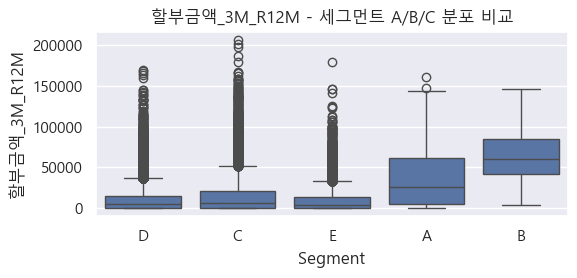

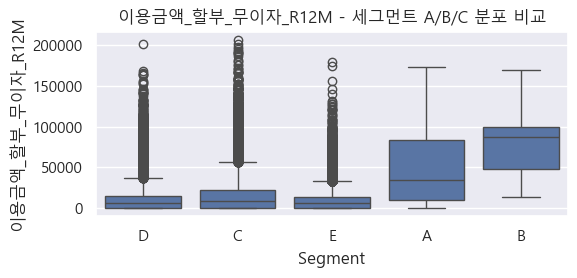

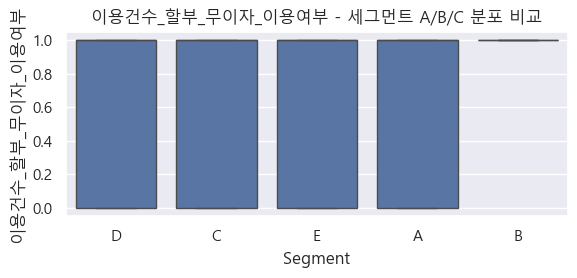

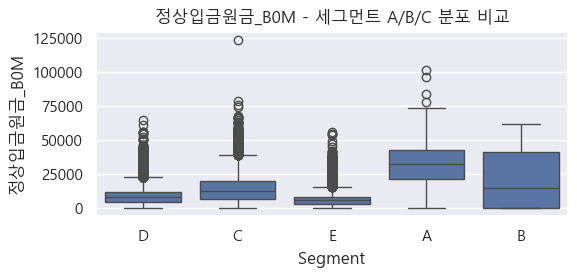

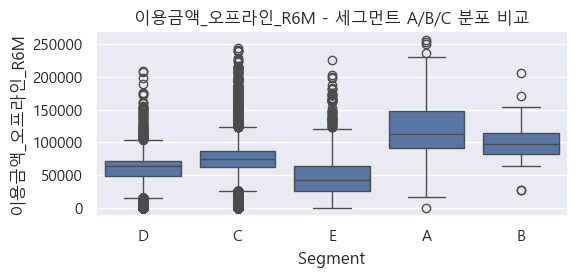

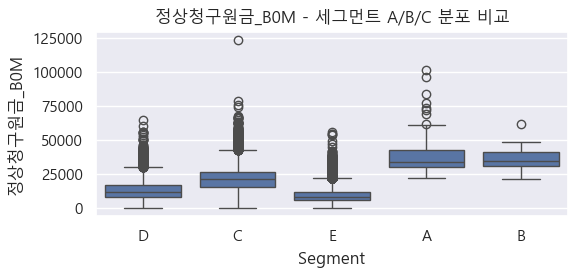

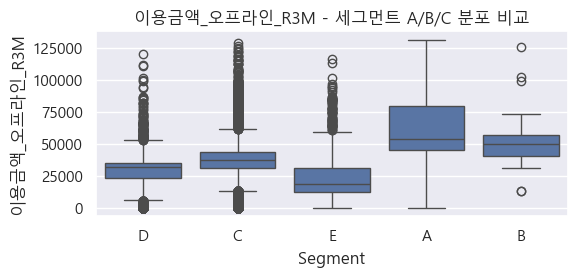

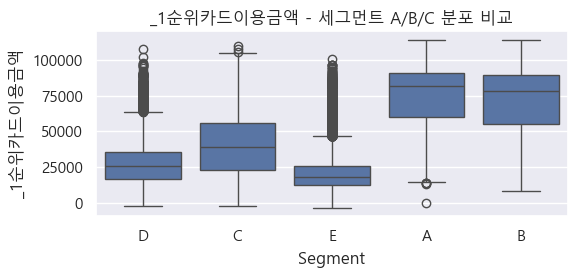

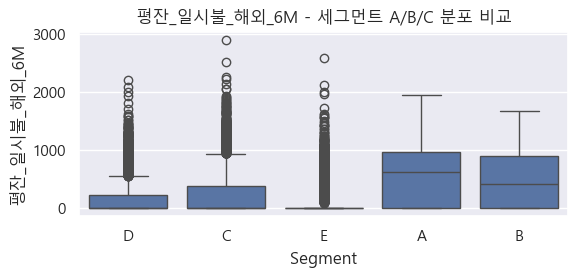

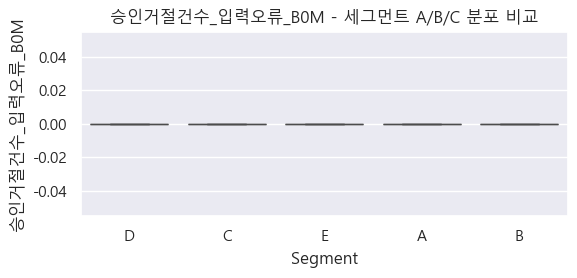

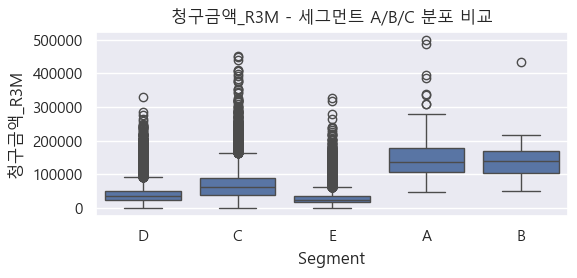

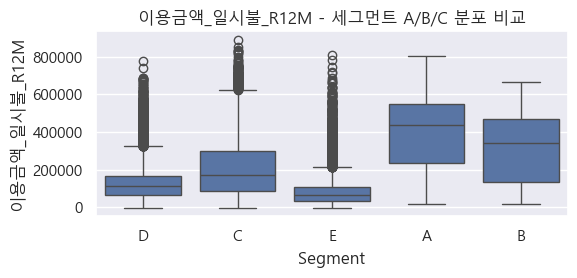

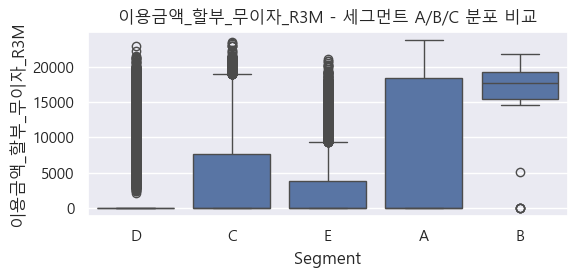

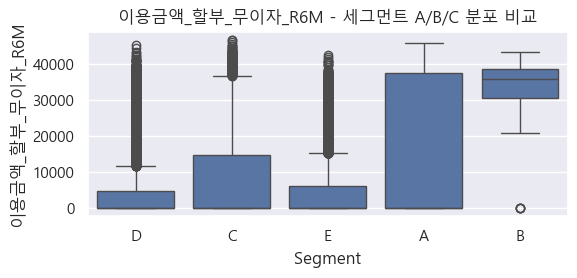

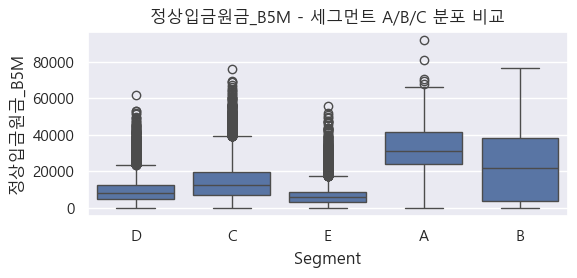

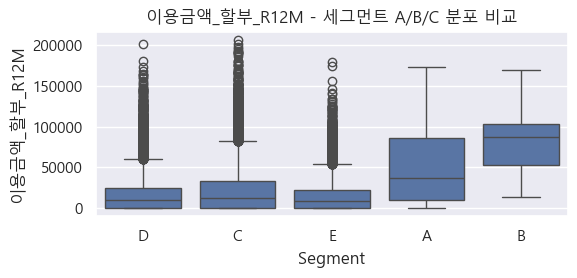

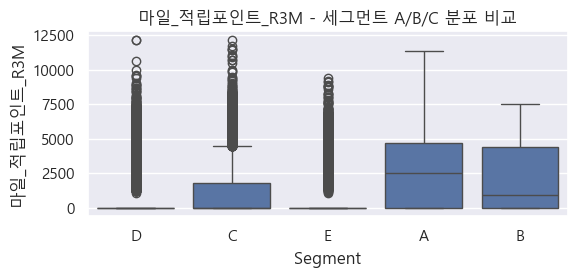

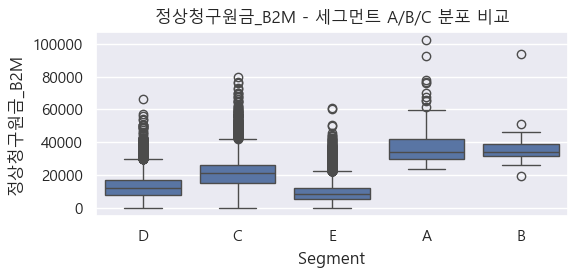

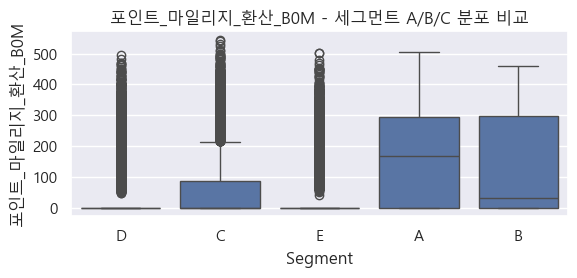

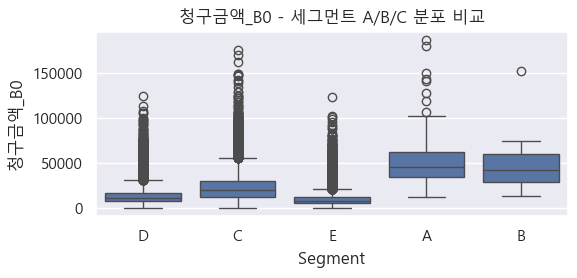

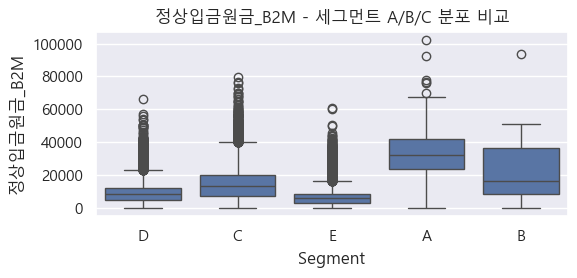

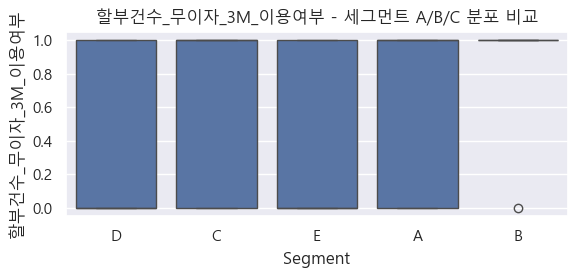

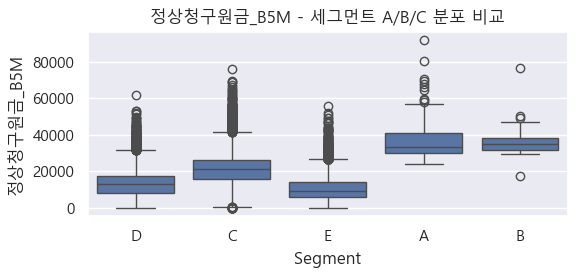

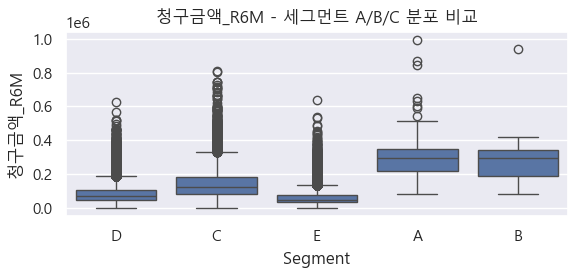

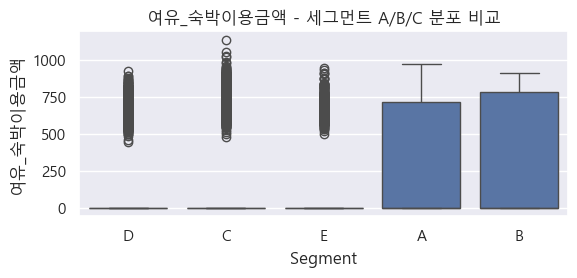

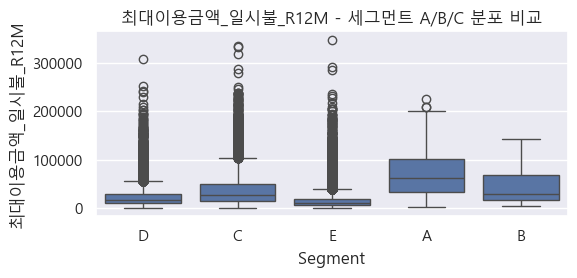

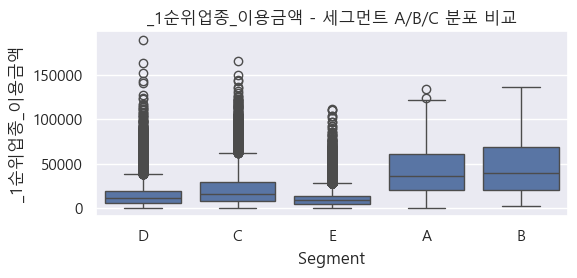

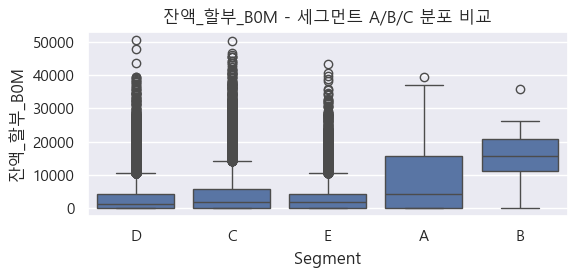

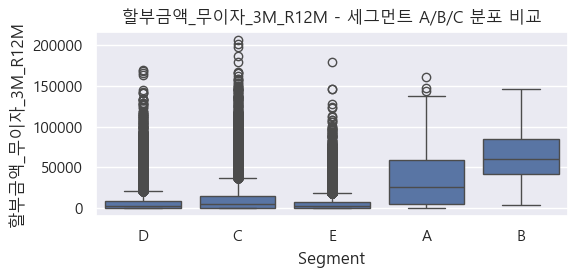

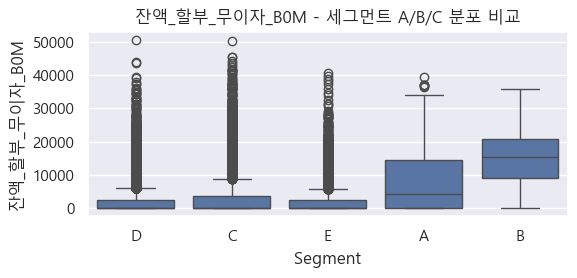

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화할 변수 목록 (Segment별 비교)
columns_to_check = [
    '할부금액_3M_R12M', '이용금액_할부_무이자_R12M', '이용건수_할부_무이자_이용여부', '정상입금원금_B0M', '이용금액_오프라인_R6M',
    '정상청구원금_B0M', '이용금액_오프라인_R3M', '_1순위카드이용금액', '평잔_일시불_해외_6M', '승인거절건수_입력오류_B0M',
    '청구금액_R3M', '이용금액_일시불_R12M', '이용금액_할부_무이자_R3M', '이용금액_할부_무이자_R6M', '정상입금원금_B5M',
    '이용금액_할부_R12M', '마일_적립포인트_R3M', '정상청구원금_B2M', '포인트_마일리지_환산_B0M', '청구금액_B0',
    '정상입금원금_B2M', '할부건수_무이자_3M_이용여부', '정상청구원금_B5M', '청구금액_R6M', '여유_숙박이용금액',
    '최대이용금액_일시불_R12M', '_1순위업종_이용금액', '잔액_할부_B0M', '할부금액_무이자_3M_R12M', '잔액_할부_무이자_B0M'
]

# boxplot으로 시각화
for col in columns_to_check:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=vip_df, x='Segment', y=col)
    plt.title(f"{col} - 세그먼트 A/B/C 분포 비교")
    plt.xlabel("Segment")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

### 해석 하기 위해서 좀 분류해두기


### 🔹 할부 및 무이자 관련 🔹



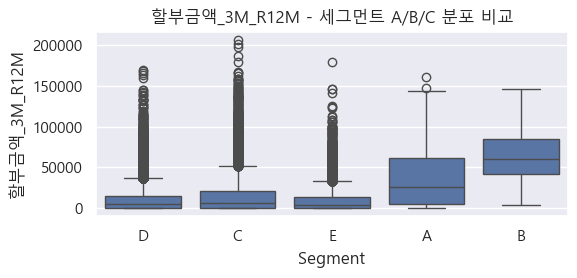

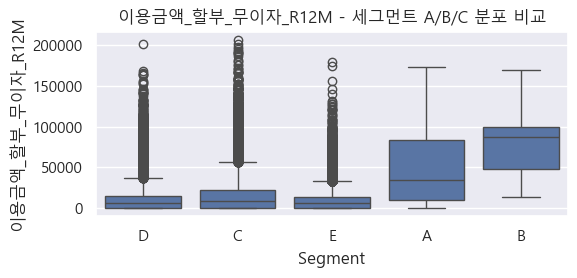

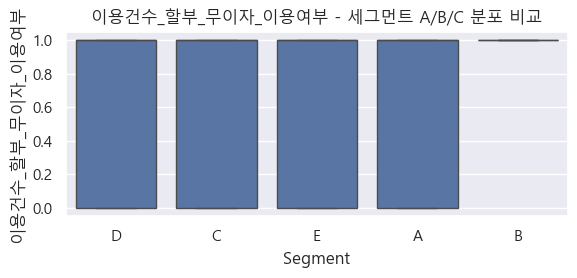

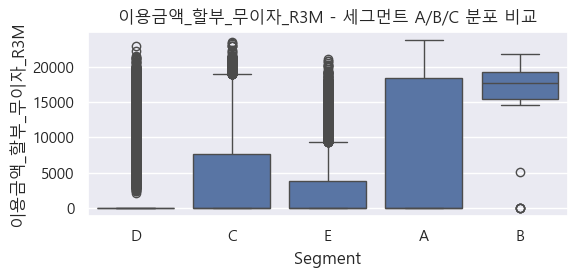

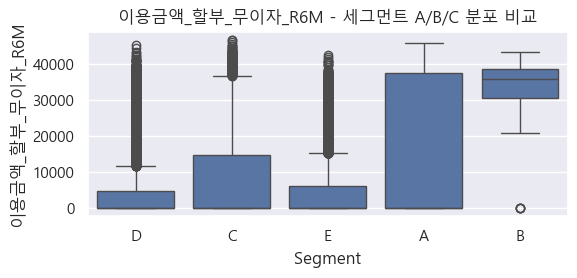

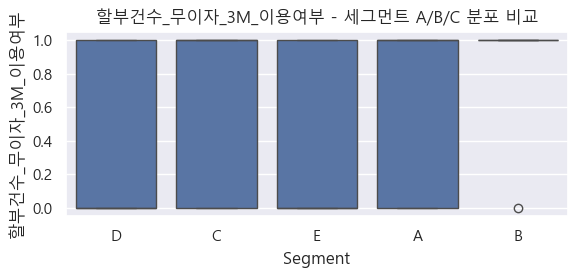

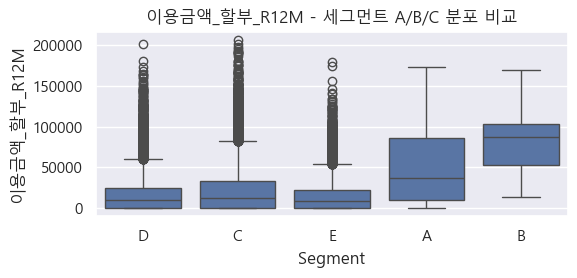

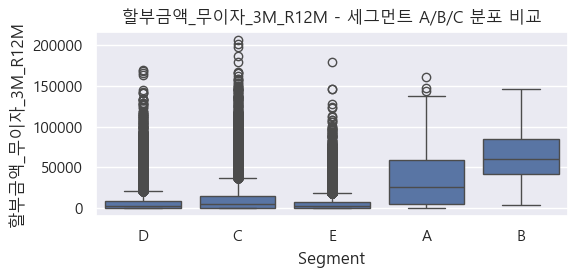

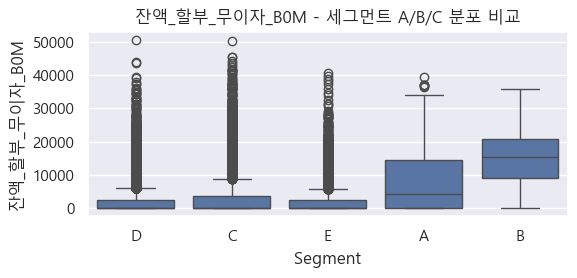

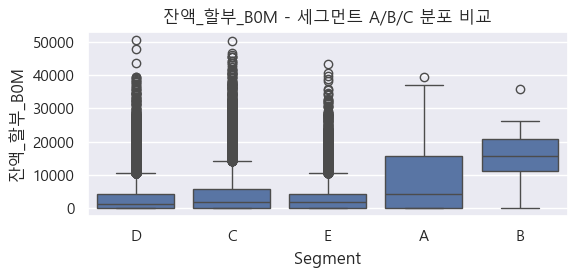


### 🔹 입금 및 청구 관련 🔹



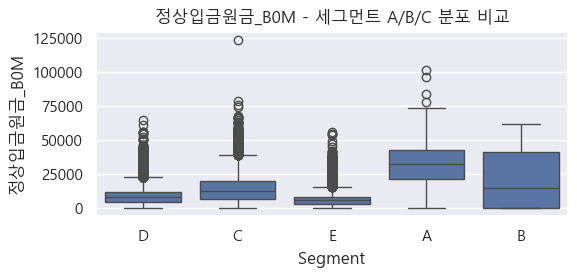

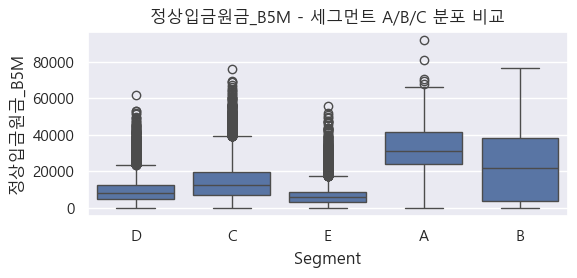

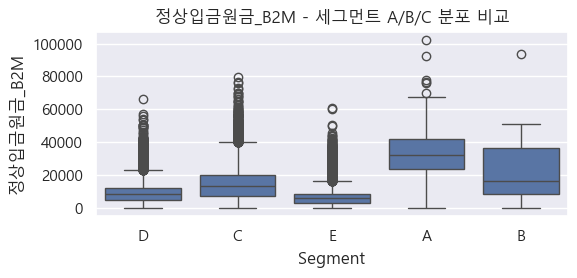

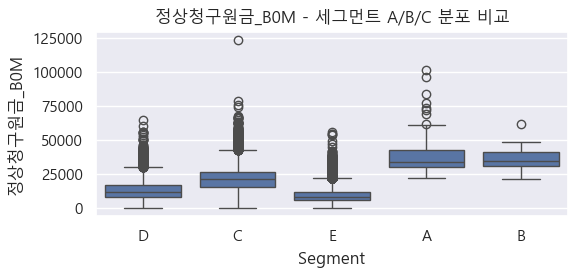

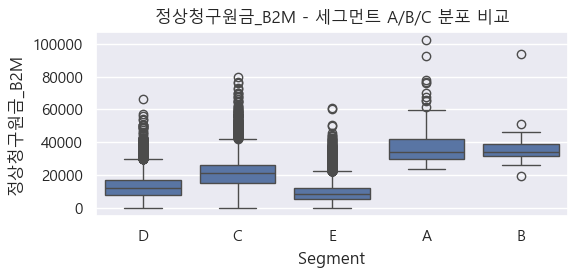

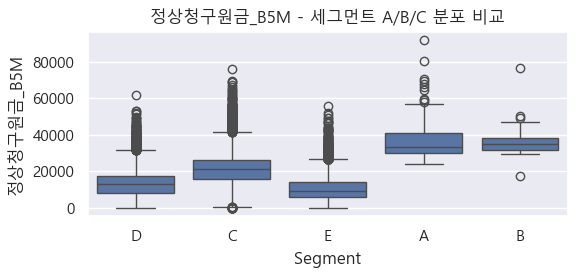

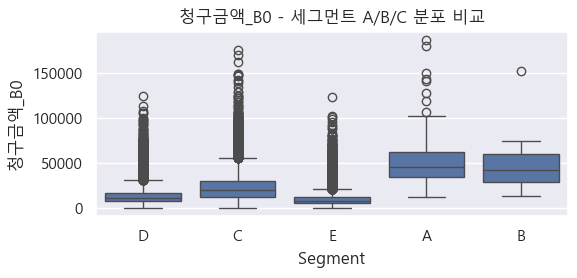

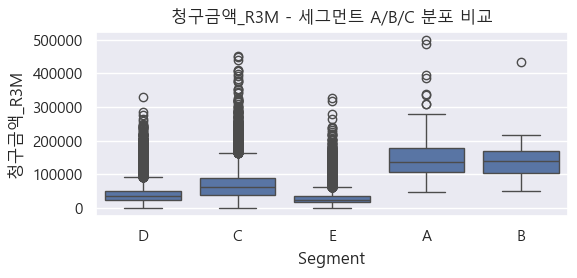

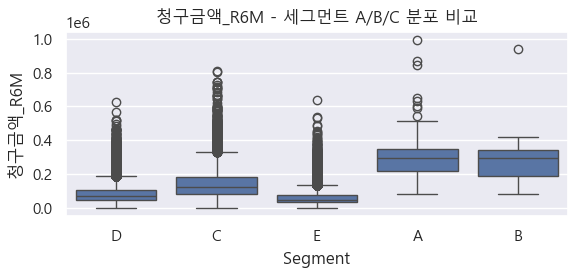


### 🔹 오프라인 및 해외 사용 내역 🔹



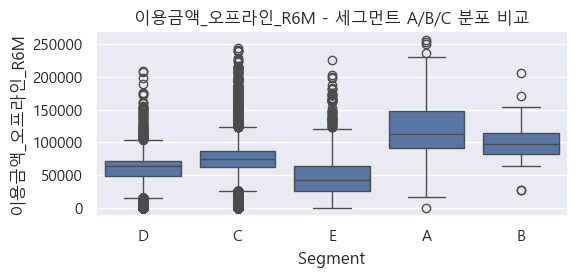

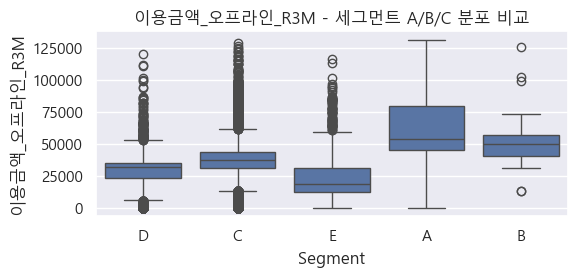

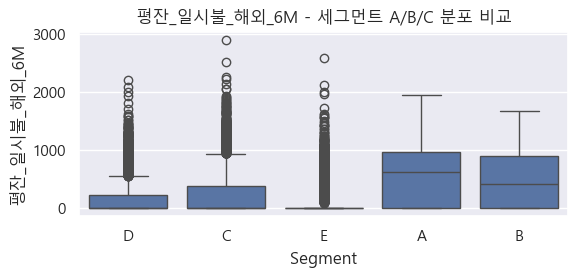

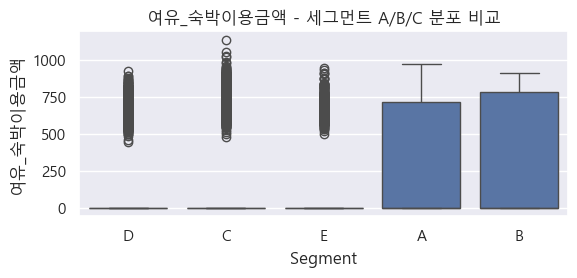


### 🔹 카드 사용 패턴 및 포인트 🔹



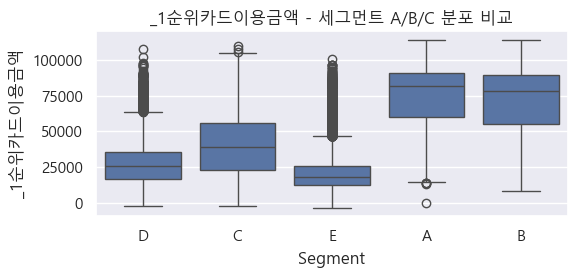

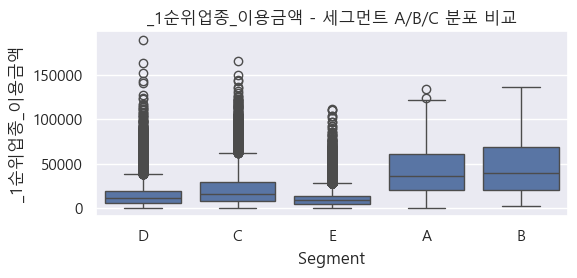

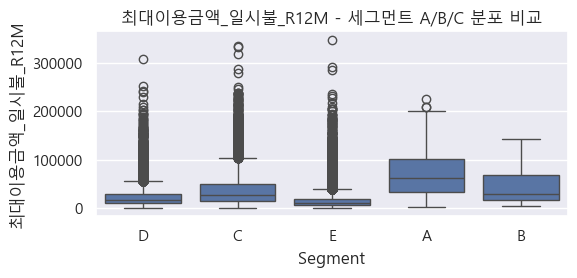

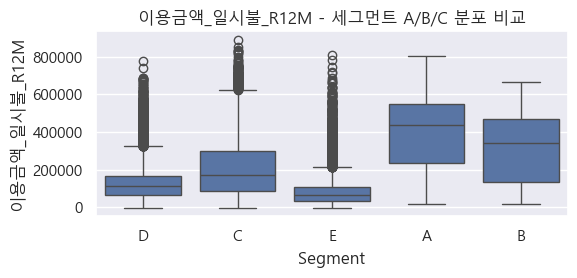

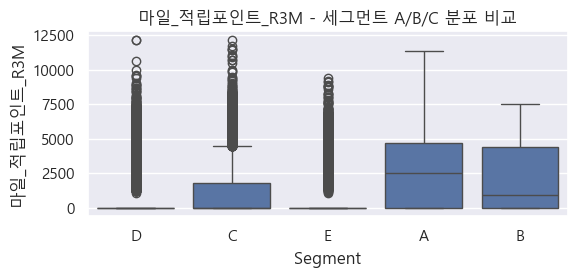

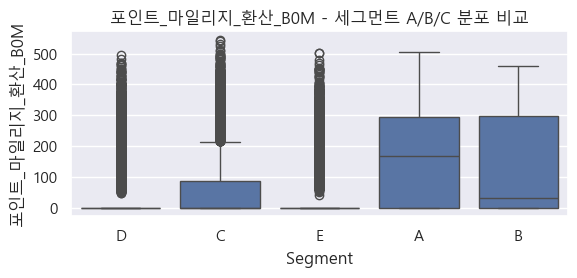

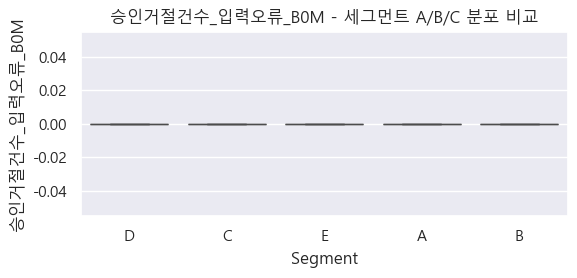

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# 카테고리별 변수 목록 정의
plot_sections = {
    "할부 및 무이자 관련": [
        '할부금액_3M_R12M', '이용금액_할부_무이자_R12M', '이용건수_할부_무이자_이용여부',
        '이용금액_할부_무이자_R3M', '이용금액_할부_무이자_R6M', '할부건수_무이자_3M_이용여부',
        '이용금액_할부_R12M', '할부금액_무이자_3M_R12M', '잔액_할부_무이자_B0M', '잔액_할부_B0M'
    ],
    "입금 및 청구 관련": [
        '정상입금원금_B0M', '정상입금원금_B5M', '정상입금원금_B2M',
        '정상청구원금_B0M', '정상청구원금_B2M', '정상청구원금_B5M',
        '청구금액_B0', '청구금액_R3M', '청구금액_R6M'
    ],
    "오프라인 및 해외 사용 내역": [
        '이용금액_오프라인_R6M', '이용금액_오프라인_R3M',
        '평잔_일시불_해외_6M', '여유_숙박이용금액'
    ],
    "카드 사용 패턴 및 포인트": [
        '_1순위카드이용금액', '_1순위업종_이용금액', '최대이용금액_일시불_R12M',
        '이용금액_일시불_R12M', '마일_적립포인트_R3M', '포인트_마일리지_환산_B0M',
        '승인거절건수_입력오류_B0M'
    ]
}

# 시각화 루프
for category, cols in plot_sections.items():
    print(f"\n### 🔹 {category} 🔹\n")  # 콘솔용 구분선, 노트북에서는 생략 가능
    for col in cols:
        plt.figure(figsize=(6, 3))
        sns.boxplot(data=vip_df, x='Segment', y=col)
        plt.title(f"{col} - 세그먼트 A/B/C 분포 비교")
        plt.xlabel("Segment")
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

---

### 📌 1. 할부 및 무이자 관련 특성 비교 (Segment A/B/C)

#### ✅ 주요 비교 항목:
- `할부금액_3M_R12M`
- `이용금액_할부_무이자_R12M`
- `이용건수_할부_무이자_이용여부`
- `이용금액_할부_무이자_R3M`
- `이용금액_할부_무이자_R6M`
- `할부건수_무이자_3M_이용여부`
- `이용금액_할부_R12M`
- `할부금액_무이자_3M_R12M`
- `잔액_할부_무이자_B0M`
- `잔액_할부_B0M`

#### 🔍 해석 요약:

- **Segment B**는 전반적으로 할부 및 무이자 관련 이용 규모가 가장 높음.  
  특히 `이용금액_할부_무이자_R12M`, `이용금액_할부_무이자_R6M`, `잔액_할부_무이자_B0M` 등에서 뚜렷한 차이를 보임.

- **Segment A**도 높은 편이지만 B보다는 소폭 낮고, **C/D/E**는 상대적으로 낮은 수준.

- **무이자 할부 이용여부(0/1)**로 파생된 변수들을 보면, 대부분 Segment A/B가 1회 이상 이용률이 매우 높으며,  
  C/D/E는 소극적인 모습을 보임.

#### 💡 인사이트:

- **Segment B**는 할부 및 무이자 혜택에 적극적인 반응을 보이는 고가용 고객군일 가능성이 있음.  
  → **무이자 프로모션 제공** 또는 **장기 할부 혜택** 대상 고객으로 적합.

- **Segment C/D**는 할부 사용 자체가 적으므로, **소액 일시불 중심의 이용 패턴**일 가능성.  
  → 이들에게는 **간단한 캐시백 이벤트**가 더 유효할 수 있음.

---


## 📦 입금 및 청구 관련 항목: 세그먼트별 비교 분석

### 1. 정상입금원금 관련 항목
- **정상입금원금_B0M, B2M, B5M** 모두 A, B 세그먼트에서 중앙값과 상위 분포가 높은 편이다.
- 특히 **Segment A**는 정상입금원금의 상자 범위가 다른 세그먼트보다 넓으며, 상한치도 높아 활발한 상환 활동을 보여준다.
- **Segment B**도 높은 중앙값을 가지며, 일부 높은 금액의 고객이 포함되어 있는 것으로 보인다.
- **C, D, E**는 비교적 낮은 수준에서 비슷한 분포를 보이며, 정기적인 상환 활동이 다소 낮을 수 있다.

### 2. 정상청구원금 관련 항목
- **정상청구원금_B0M, B2M, B5M** 역시 A, B 세그먼트에서 두드러지게 높은 값 분포를 보인다.
- 이는 해당 그룹의 고객들이 일정한 수준 이상의 카드 이용 후 청구 대상이 되고 있음을 시사하며, **활발한 소비 또는 한도 활용 패턴**이 나타난다.
- **Segment D, E**는 청구 금액이 매우 낮은 고객이 많아 소비 활동이 제한적이거나 일시불 이외의 방식 이용 비중이 낮을 가능성도 있다.

### 3. 청구금액 관련 항목
- **청구금액_B0, R3M, R6M** 모두 A, B 세그먼트에서 평균적으로 더 높은 수준을 기록하며, 특히 A세그먼트는 **상위 25% 구간 이상**에서도 큰 차이를 보인다.
- 청구금액_R6M에서는 일부 고객이 600,000 이상을 사용하는 등 **고소비 성향**도 확인된다.
- 반면 C, D, E 세그먼트는 대부분의 고객이 낮은 청구금액 내에서 분포하며, 소비 빈도 또는 소비 규모 측면에서 큰 차이를 보여준다.

### 🧩 종합 해석
- **Segment A와 B**는 전반적으로 입금 및 청구 항목에서 높은 활동성을 보이며, 이는 신용카드 이용 규모나 정기적인 상환 활동이 활발함을 의미한다.
- **Segment C, D, E**는 청구 및 입금 금액이 작고 분포도 좁아 카드 활용도가 낮을 수 있으며, 이에 따라 **잠재 성장 고객** 혹은 **저위험/저활동 고객군**으로 분류될 수 있다.


## 🌍 오프라인 및 해외 사용 내역: 세그먼트별 비교 분석

### 1. 이용금액_오프라인_R6M, R3M
- **Segment A**는 두 기간 모두에서 오프라인 이용금액이 가장 높게 나타남. 특히 R6M에서는 최대값과 중앙값이 크게 증가.
- **Segment B**도 높은 편이지만, A에 비해서는 중앙값이 다소 낮은 분포를 보임.
- 반면 **C, D, E 세그먼트**는 전반적으로 낮은 분포와 좁은 박스를 보이며 오프라인 사용 내역이 제한적임을 시사.
- 이는 A/B 세그먼트의 고객이 오프라인 매장이나 실물 소비에 더 활발하다는 점을 의미함.

### 2. 평잔_일시불_해외_6M
- **Segment A, B**는 해외 일시불 평균 잔액에서도 상대적으로 높은 중앙값을 기록.
- 특히 **Segment A**는 박스 상단이 넓게 퍼져 있어 일부 고객의 높은 해외 사용 비중이 드러남.
- **Segment C, D, E**는 대부분의 고객이 해외 일시불을 거의 사용하지 않으며, **0에 가까운 분포**를 형성함.

### 3. 여유_숙박이용금액
- **Segment A, B**는 여가/숙박 관련 사용금액이 비교적 높고 뚜렷한 중앙값과 박스플롯을 보임.
- 특히 Segment A는 숙박 이용금액에 있어 상한값도 존재하며 **프리미엄 또는 고소득 고객층의 특성**이 반영될 수 있음.
- **Segment C, D, E**는 거의 사용이 없거나, 분포가 매우 좁아 해당 소비 카테고리에 관심이 낮은 그룹일 수 있음.

### 🧩 종합 해석
- **Segment A, B**는 오프라인, 해외 소비, 숙박 등 **실물 소비 및 여가 관련 사용 패턴이 활발**하며, 프리미엄 혜택이나 여행·레저 관련 상품에 민감하게 반응할 수 있는 그룹.
- **Segment C, D, E**는 전반적으로 **보수적인 소비 성향** 또는 **카드 활용도가 낮은 특성**을 보이며, 오프라인 중심의 마케팅 효과가 낮을 수 있음.


### 📌 4. 카드 사용 패턴 및 포인트

#### 🔹 `_1순위카드이용금액`
- 세그먼트 A와 B는 전체적으로 높은 이용금액을 보이며, 특히 A에서 변동성이 큼.
- 반면, D, C, E 그룹은 상대적으로 낮은 카드 사용 패턴을 보임.

#### 🔹 `_1순위업종_이용금액`
- 카드와 유사한 패턴으로 A, B 그룹이 주요 업종에서의 소비액이 높음.
- D, C, E 그룹은 전반적으로 낮은 수준.

#### 🔹 `최대이용금액_일시불_R12M`
- 최대 일시불 결제 금액 역시 A, B에서 크게 나타남.
- D, C, E는 일시불 소비에 있어 큰 금액 사용 사례가 드묾.

#### 🔹 `이용금액_일시불_R12M`
- 일시불 전체 사용금액도 A, B 그룹이 높음.
- Segment D는 특히 평균이 매우 낮으며 소비 성향이 다소 소극적일 수 있음.

#### 🔹 `마일_적립포인트_R3M`
- 포인트 적립 측면에서 B 그룹이 가장 많은 적립을 기록, A가 뒤를 이음.
- C, D, E는 적립 빈도가 적음.

#### 🔹 `포인트_마일리지_환산_B0M`
- 환산 포인트에서도 B 그룹이 높은 값을 보이며, A 또한 상위권.
- 반면 C, D, E는 마일리지 활용률도 낮은 편으로 분석됨.

#### 🔹 `승인거절건수_입력오류_B0M`
- 거의 모든 그룹에서 값이 0으로 수렴 → 분석상 큰 차이 없음.


## 최종 정리(7/9)
- Segment 분포의 구조는 거의 유지되고 있음 → 특히 VIP/이탈/충성/신규 고객의 Segment 비율이 기간에 따라 큰 변동이 없음
- 따라서 당월 기준 분석만으로도 충분히 설득력 있음
- KPI 방향으로 8번 성과 시트를 활용하는 것은 매우 타당한 다음 단계